In [12]:
from recycling_app.preprocessing.loading_data import create_data_loaders
from recycling_app.preprocessing.preprocessing import Preprocessor
from recycling_app.model.feature_extraction import FeatureExtractor
import os
import torch

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
random_seed = 125

In [15]:
preprocessor = Preprocessor()

In [25]:
dataset_path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw")
os.makedirs(os.path.join(os.path.dirname(os.getcwd()), "data", "features"), exist_ok=True)
features_path = os.path.join(os.path.dirname(os.getcwd()), "data", "features")

In [63]:
train_loader, val_loader, test_loader, dataset = create_data_loaders(dataset_path=dataset_path, batch_size=16, seed=random_seed, preprocessor=preprocessor)

In [18]:
feature_extractor_resnet101 = FeatureExtractor("resnet101")

In [19]:
train_features, train_labels = feature_extractor_resnet101.extract_features(train_loader)

Extracting features: 100%|██████████| 292/292 [09:22<00:00,  1.93s/batch]


In [26]:
torch.save(train_features, os.path.join(features_path,"train_features_resnet101.pt"))
torch.save(train_labels, os.path.join(features_path, "train_labels_resnet101.pt"))

In [27]:
val_features, val_labels = feature_extractor_resnet101.extract_features(val_loader)

Extracting features: 100%|██████████| 73/73 [02:19<00:00,  1.91s/batch]


In [28]:
torch.save(val_features, os.path.join(features_path, "val_features_resnet101.pt"))
torch.save(val_labels, os.path.join(features_path, "val_labels_resnet101.pt"))

In [29]:
test_features, test_labels = feature_extractor_resnet101.extract_features(test_loader)

Extracting features: 100%|██████████| 91/91 [02:51<00:00,  1.89s/batch]


In [30]:
torch.save(test_features, os.path.join(features_path, "test_features_resnet101.pt"))
torch.save(test_labels, os.path.join(features_path, "test_labels_resnet101.pt"))

In [31]:
feature_extractor_alexnet = FeatureExtractor("alexnet")

In [32]:
train_features, train_labels = feature_extractor_alexnet.extract_features(train_loader)

Extracting features: 100%|██████████| 292/292 [01:57<00:00,  2.48batch/s]


In [33]:
torch.save(train_features, os.path.join(features_path, "train_features_alexnet.pt"))
torch.save(train_labels, os.path.join(features_path, "train_labels_alexnet.pt"))

In [34]:
val_features, val_labels = feature_extractor_alexnet.extract_features(val_loader)

Extracting features: 100%|██████████| 73/73 [00:31<00:00,  2.30batch/s]


In [35]:
torch.save(val_features, os.path.join(features_path, "val_features_alexnet.pt"))
torch.save(val_labels, os.path.join(features_path, "val_labels_alexnet.pt"))

In [36]:
test_features, test_labels = feature_extractor_alexnet.extract_features(test_loader)

Extracting features: 100%|██████████| 91/91 [00:38<00:00,  2.37batch/s]


In [37]:
torch.save(test_features, os.path.join(features_path, "test_features_alexnet.pt"))
torch.save(test_labels, os.path.join(features_path, "test_labels_alexnet.pt"))

In [38]:
feature_extractor_googlenet = FeatureExtractor("googlenet")

In [39]:
train_features, train_labels = feature_extractor_googlenet.extract_features(train_loader)

Extracting features: 100%|██████████| 292/292 [04:27<00:00,  1.09batch/s]


In [40]:
torch.save(train_features, os.path.join(features_path, "train_features_googlenet.pt"))
torch.save(train_labels, os.path.join(features_path, "train_labels_googlenet.pt"))

In [41]:
val_features, val_labels = feature_extractor_googlenet.extract_features(val_loader)

Extracting features: 100%|██████████| 73/73 [01:02<00:00,  1.16batch/s]


In [42]:
torch.save(val_features, os.path.join(features_path, "val_features_googlenet.pt"))
torch.save(val_labels, os.path.join(features_path, "val_labels_googlenet.pt"))

In [43]:
test_features, test_labels = feature_extractor_googlenet.extract_features(test_loader)

Extracting features: 100%|██████████| 91/91 [01:21<00:00,  1.12batch/s]


In [44]:
torch.save(test_features, os.path.join(features_path, "test_features_googlenet.pt"))
torch.save(test_labels, os.path.join(features_path, "test_labels_googlenet.pt"))

In [45]:
feature_extractor_vgg19 = FeatureExtractor("vgg19")

In [46]:
train_features, train_labels = feature_extractor_vgg19.extract_features(train_loader)

Extracting features: 100%|██████████| 292/292 [13:07<00:00,  2.70s/batch]


In [47]:
torch.save(train_features, os.path.join(features_path, "train_features_vgg19.pt"))
torch.save(train_labels, os.path.join(features_path, "train_labels_vgg19.pt"))

In [48]:
val_features, val_labels = feature_extractor_vgg19.extract_features(val_loader)

Extracting features: 100%|██████████| 73/73 [03:16<00:00,  2.69s/batch]


In [49]:
torch.save(val_features, os.path.join(features_path, "val_features_vgg19.pt"))
torch.save(val_labels, os.path.join(features_path,"val_labels_vgg19.pt"))

In [50]:
test_features, test_labels = feature_extractor_vgg19.extract_features(test_loader)

Extracting features: 100%|██████████| 91/91 [04:02<00:00,  2.67s/batch]


In [51]:
torch.save(test_features, os.path.join(features_path,"test_features_vgg19.pt"))
torch.save(test_labels, os.path.join(features_path, "test_labels_vgg19.pt"))

## Jak używać?

```python
train_features, train_labels = feature_extractor.extract_features(train_loader)
```

No i potem uczyć modele na train_features i train_labels. To samo, jeśli walidacyjny lub testowy.

In [52]:
from sklearn.linear_model import SGDClassifier # svm with stochastic gradient descent - was used in the paper
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_pred, y_true, dataset):
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [56]:
train_features, train_labels = torch.load(os.path.join(features_path, "train_features_resnet101.pt")), torch.load(os.path.join(features_path, "train_labels_resnet101.pt"))
val_features, val_labels = torch.load(os.path.join(features_path, "val_features_resnet101.pt")), torch.load(os.path.join(features_path, "val_labels_resnet101.pt"))

C:\Users\alicj\AppData\Local\Temp\ipykernel_16672\2034176707.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features, train_labels = torch.load(os.path.join(featu

In [57]:
sgd_clf = SGDClassifier(random_state=random_seed)
sgd_clf.fit(train_features, train_labels)

SGDClassifier(random_state=125)

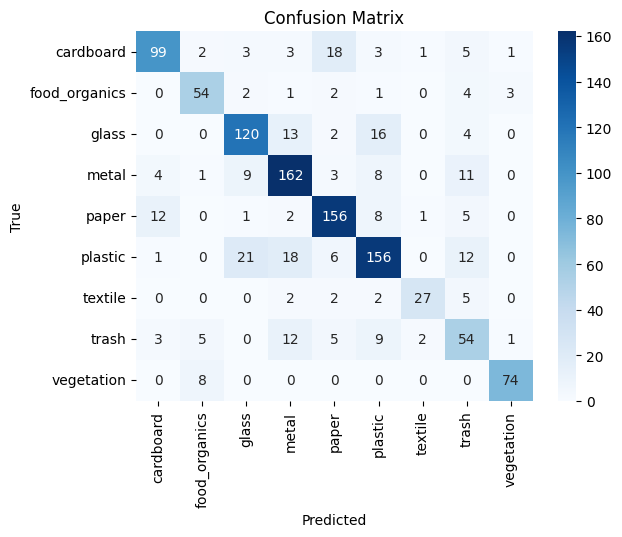

In [64]:
plot_confusion_matrix(sgd_clf.predict(val_features), val_labels, dataset)

In [66]:
print(classification_report(val_labels, sgd_clf.predict(val_features), target_names=dataset.classes))

               precision    recall  f1-score   support

    cardboard       0.83      0.73      0.78       135
food_organics       0.77      0.81      0.79        67
        glass       0.77      0.77      0.77       155
        metal       0.76      0.82      0.79       198
        paper       0.80      0.84      0.82       185
      plastic       0.77      0.73      0.75       214
      textile       0.87      0.71      0.78        38
        trash       0.54      0.59      0.57        91
   vegetation       0.94      0.90      0.92        82

     accuracy                           0.77      1165
    macro avg       0.78      0.77      0.77      1165
 weighted avg       0.78      0.77      0.77      1165

